#apartment-jeonse-prediction(프로젝트2)

#01.프로젝트 개요
서울시 마포구 전세금 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "/content/아파트(전세)_서울마포구_20250928.csv"
df = pd.read_csv(url, encoding="cp949")
df.head()

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
0,1,서울특별시 마포구 상수동,402,402,0,래미안밤섬리베뉴Ⅰ,전세,125.3100,202509,26,...,0,7,2014,독막로20나길 22,202510~202710,갱신,사용,"125,000",0.0,아파트
1,2,서울특별시 마포구 성산동,446,446,0,성산시영(대우),전세,50.0300,202509,26,...,0,8,1986,월드컵북로 235,202510~202710,갱신,사용,"27,000",0.0,아파트
2,3,서울특별시 마포구 아현동,777,777,0,마포래미안푸르지오1단지,월세,59.9236,202509,26,...,200,6,2014,마포대로 195,202510~202610,신규,-,NaN,NaN,아파트
3,4,서울특별시 마포구 신공덕동,172,172,0,펜트라우스,월세,115.0400,202509,26,...,166,16,2011,백범로 205,202510~202710,갱신,사용,"60,000",166.0,아파트
4,5,서울특별시 마포구 망원동,513,513,0,상암마젤란21,전세,55.8500,202509,26,...,0,4,2005,방울내로11길 43,202509~202709,갱신,사용,"40,000",0.0,아파트


#02.데이터 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12258 entries, 0 to 12257
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NO            12258 non-null  int64  
 1   시군구           12258 non-null  object 
 2   번지            12258 non-null  object 
 3   본번            12258 non-null  int64  
 4   부번            12258 non-null  int64  
 5   단지명           12258 non-null  object 
 6   전월세구분         12258 non-null  object 
 7   전용면적(㎡)       12258 non-null  float64
 8   계약년월          12258 non-null  int64  
 9   계약일           12258 non-null  int64  
 10  보증금(만원)       12258 non-null  object 
 11  월세금(만원)       12258 non-null  int64  
 12  층             12258 non-null  int64  
 13  건축년도          12258 non-null  int64  
 14  도로명           12258 non-null  object 
 15  계약기간          12258 non-null  object 
 16  계약구분          12258 non-null  object 
 17  갱신요구권 사용      12258 non-null  object 
 18  종전계약 보증금(만원)  4950 non-nul

In [ ]:
df_jeonse = df[df["월세금(만원)"] == 0].copy()

print("전체 데이터 건수:", len(df))
print("전세만 남긴 데이터 건수:", len(df_jeonse))
print(df_jeonse.head())

전체 데이터 건수: 12258
전세만 남긴 데이터 건수: 6696
   NO            시군구    번지    본번  부번         단지명 전월세구분  전용면적(㎡)    계약년월  계약일  \
0   1  서울특별시 마포구 상수동   402   402   0   래미안밤섬리베뉴Ⅰ    전세   125.31  202509   26   
1   2  서울특별시 마포구 성산동   446   446   0    성산시영(대우)    전세    50.03  202509   26   
4   5  서울특별시 마포구 망원동   513   513   0     상암마젤란21    전세    55.85  202509   26   
5   6  서울특별시 마포구 망원동   513   513   0     상암마젤란21    전세    55.85  202509   26   
6   7  서울특별시 마포구 상암동  1660  1660   0  상암월드컵파크7단지    전세    84.74  202509   26   

   ... 월세금(만원)   층  건축년도         도로명           계약기간 계약구분 갱신요구권 사용  \
0  ...       0   7  2014  독막로20나길 22  202510~202710   갱신       사용   
1  ...       0   8  1986   월드컵북로 235  202510~202710   갱신       사용   
4  ...       0   4  2005  방울내로11길 43  202509~202709   갱신       사용   
5  ...       0   4  2005  방울내로11길 43  202509~202709   갱신       사용   
6  ...       0  12  2005   상암산로1길 92  202511~202711   신규        -   

  종전계약 보증금(만원) 종전계약 월세(만원)  주택유형  
0      125,000         0.0   아파트

In [ ]:
df_jeonse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6696 entries, 0 to 12257
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NO            6696 non-null   int64  
 1   시군구           6696 non-null   object 
 2   번지            6696 non-null   object 
 3   본번            6696 non-null   int64  
 4   부번            6696 non-null   int64  
 5   단지명           6696 non-null   object 
 6   전월세구분         6696 non-null   object 
 7   전용면적(㎡)       6696 non-null   float64
 8   계약년월          6696 non-null   int64  
 9   계약일           6696 non-null   int64  
 10  보증금(만원)       6696 non-null   object 
 11  월세금(만원)       6696 non-null   int64  
 12  층             6696 non-null   int64  
 13  건축년도          6696 non-null   int64  
 14  도로명           6696 non-null   object 
 15  계약기간          6696 non-null   object 
 16  계약구분          6696 non-null   object 
 17  갱신요구권 사용      6696 non-null   object 
 18  종전계약 보증금(만원)  2846 non-null   ob

In [ ]:
#  보증금 → 숫자로 변환
# Convert to string first, remove commas, and then convert to numeric, coercing errors
df_jeonse["보증금(만원)"] = df_jeonse["보증금(만원)"].astype(str).str.replace(",", "", regex=False)
df_jeonse["보증금(만원)"] = pd.to_numeric(df_jeonse["보증금(만원)"], errors='coerce').fillna(0).astype(int)

#  불필요 컬럼 삭제
drop_cols = ["NO", "번지", "본번", "부번", "계약구분","계약일",
             "계약기간", "종전계약 보증금(만원)", "종전계약 월세(만원)", "월세금(만원)", "전월세구분", "갱신요구권 사용","주택유형"]

df_jeonse = df_jeonse.drop(columns=[c for c in drop_cols if c in df_jeonse.columns])

In [ ]:
df_jeonse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6696 entries, 0 to 12257
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      6696 non-null   object 
 1   단지명      6696 non-null   object 
 2   전용면적(㎡)  6696 non-null   float64
 3   계약년월     6696 non-null   int64  
 4   보증금(만원)  6696 non-null   int64  
 5   층        6696 non-null   int64  
 6   건축년도     6696 non-null   int64  
 7   도로명      6696 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 470.8+ KB


In [ ]:
df_jeonse.head()

,시군구,단지명,전용면적(㎡),계약년월,보증금(만원),층,건축년도,도로명
0,서울특별시 마포구 상수동,래미안밤섬리베뉴Ⅰ,125.31,202509,130000,7,2014,독막로20나길 22
1,서울특별시 마포구 성산동,성산시영(대우),50.03,202509,28300,8,1986,월드컵북로 235
4,서울특별시 마포구 망원동,상암마젤란21,55.85,202509,42000,4,2005,방울내로11길 43
5,서울특별시 마포구 망원동,상암마젤란21,55.85,202509,42000,4,2005,방울내로11길 43
6,서울특별시 마포구 상암동,상암월드컵파크7단지,84.74,202509,72000,12,2005,상암산로1길 92


In [ ]:
round(df_jeonse.describe(),2)

,전용면적(㎡),계약년월,보증금(만원),층,건축년도
count,6696.00,6696.00,6696.00,6696.00,6696.00
mean,74.58,202480.44,65189.78,9.66,2005.88
std,22.00,41.09,27390.27,6.17,10.73
min,12.85,202409.00,3168.00,1.00,1970.00
25%,59.75,202412.00,47000.00,5.00,1999.00
50%,74.34,202503.00,63000.00,9.00,2005.00
75%,84.94,202506.00,80000.00,13.25,2014.00
max,200.17,202509.00,200000.00,38.00,2025.00


In [ ]:
round(df_jeonse.describe(include='all'), 2)

,시군구,단지명,전용면적(㎡),계약년월,보증금(만원),층,건축년도,도로명
count,6696,6696,6696.00,6696.00,6696.00,6696.00,6696.00,6696
unique,23,257,NaN,NaN,NaN,NaN,NaN,262
top,서울특별시 마포구 아현동,더클래시,NaN,NaN,NaN,NaN,NaN,마포대로 195
freq,1081,295,NaN,NaN,NaN,NaN,NaN,496
mean,NaN,NaN,74.58,202480.44,65189.78,9.66,2005.88,NaN
std,NaN,NaN,22.00,41.09,27390.27,6.17,10.73,NaN
min,NaN,NaN,12.85,202409.00,3168.00,1.00,1970.00,NaN
25%,NaN,NaN,59.75,202412.00,47000.00,5.00,1999.00,NaN
50%,NaN,NaN,74.34,202503.00,63000.00,9.00,2005.00,NaN
75%,NaN,NaN,84.94,202506.00,80000.00,13.25,2014.00,NaN


그래프로 데이터 살펴보기

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


<Figure size 2500x500 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


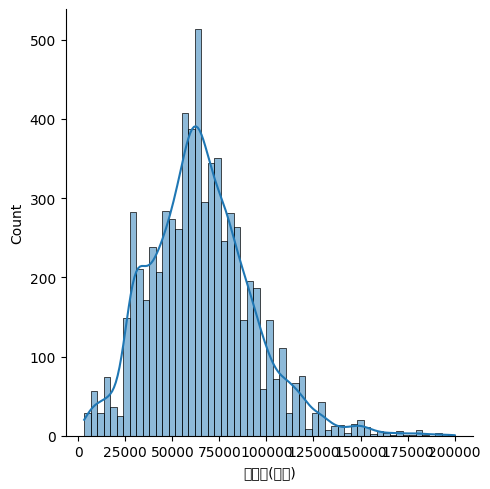

In [ ]:
plt.figure(figsize=(25, 5))
sns.displot(df_jeonse['보증금(만원)'], kde=True, )

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


<Figure size 2500x500 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


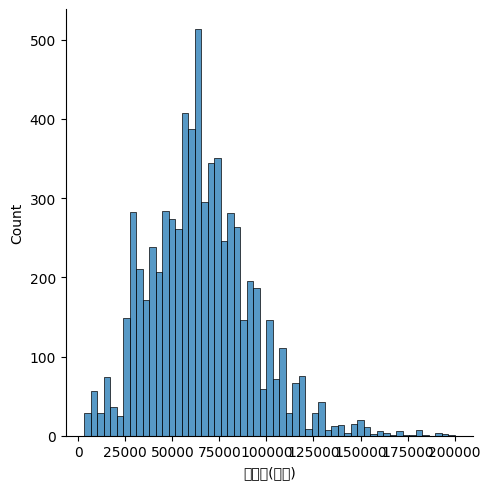

In [ ]:
plt.figure(figsize=(25, 5))
sns.displot(df_jeonse['보증금(만원)'])

<Axes: xlabel='보증금(만원)', ylabel='Count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE 

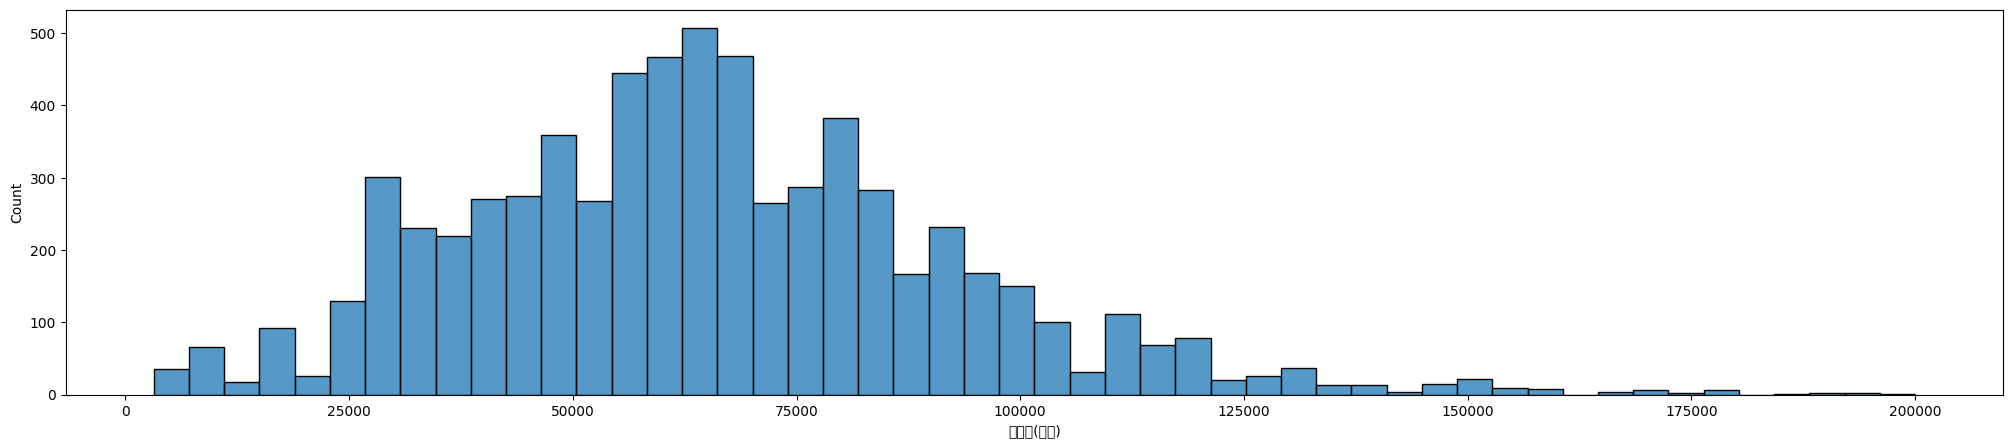

In [ ]:
plt.figure(figsize=(25, 5))
sns.histplot(df_jeonse['보증금(만원)'],bins=50)

카테고리 변수 처리

In [ ]:
df_jeonse.head(1)

,시군구,단지명,전용면적(㎡),계약년월,보증금(만원),층,건축년도,도로명
0,서울특별시 마포구 상수동,래미안밤섬리베뉴Ⅰ,125.31,202509,130000,7,2014,독막로20나길 22


In [ ]:
for i in ['시군구',	'단지명',	'도로명']:
  print(i, df_jeonse[i].nunique())

시군구 23
단지명 257
도로명 262


In [ ]:
df_jeonse_encoded = pd.get_dummies(df_jeonse, columns=['시군구',   '단지명',    '도로명'],drop_first=True).astype(int)
display(df_jeonse_encoded.head())

,전용면적(㎡),계약년월,보증금(만원),층,건축년도,시군구_서울특별시 마포구 노고산동,시군구_서울특별시 마포구 대흥동,시군구_서울특별시 마포구 도화동,시군구_서울특별시 마포구 마포동,시군구_서울특별시 마포구 망원동,...,도로명_포은로2나길 35,도로명_포은로6길 34,도로명_홍익로 10,도로명_희우정로 115-1,도로명_희우정로 15,도로명_희우정로 16,도로명_희우정로 77,도로명_희우정로1길 21,도로명_희우정로1길 27,도로명_희우정로1길 48
0,125,202509,130000,7,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,202509,28300,8,1986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55,202509,42000,4,2005,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,55,202509,42000,4,2005,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,84,202509,72000,12,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_jeonse = df_jeonse_encoded

# 03.Train/Test set 나누기

In [ ]:
X  = df_jeonse.drop('보증금(만원)', axis=1)
y = df_jeonse['보증금(만원)']

In [ ]:
X.head()

,전용면적(㎡),계약년월,층,건축년도,시군구_서울특별시 마포구 노고산동,시군구_서울특별시 마포구 대흥동,시군구_서울특별시 마포구 도화동,시군구_서울특별시 마포구 마포동,시군구_서울특별시 마포구 망원동,시군구_서울특별시 마포구 상수동,...,도로명_포은로2나길 35,도로명_포은로6길 34,도로명_홍익로 10,도로명_희우정로 115-1,도로명_희우정로 15,도로명_희우정로 16,도로명_희우정로 77,도로명_희우정로1길 21,도로명_희우정로1길 27,도로명_희우정로1길 48
0,125,202509,7,2014,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,202509,8,1986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55,202509,4,2005,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,55,202509,4,2005,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,84,202509,12,2005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,보증금(만원)
0,130000
1,28300
4,42000
5,42000
6,72000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [ ]:
X_train.head()

,전용면적(㎡),계약년월,층,건축년도,시군구_서울특별시 마포구 노고산동,시군구_서울특별시 마포구 대흥동,시군구_서울특별시 마포구 도화동,시군구_서울특별시 마포구 마포동,시군구_서울특별시 마포구 망원동,시군구_서울특별시 마포구 상수동,...,도로명_포은로2나길 35,도로명_포은로6길 34,도로명_홍익로 10,도로명_희우정로 115-1,도로명_희우정로 15,도로명_희우정로 16,도로명_희우정로 77,도로명_희우정로1길 21,도로명_희우정로1길 27,도로명_희우정로1길 48
10722,59,202411,13,2001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9102,59,202501,12,2022,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2945,84,202506,15,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11595,57,202410,12,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9356,84,202412,2,2005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train

,전용면적(㎡),계약년월,층,건축년도,시군구_서울특별시 마포구 노고산동,시군구_서울특별시 마포구 대흥동,시군구_서울특별시 마포구 도화동,시군구_서울특별시 마포구 마포동,시군구_서울특별시 마포구 망원동,시군구_서울특별시 마포구 상수동,...,도로명_포은로2나길 35,도로명_포은로6길 34,도로명_홍익로 10,도로명_희우정로 115-1,도로명_희우정로 15,도로명_희우정로 16,도로명_희우정로 77,도로명_희우정로1길 21,도로명_희우정로1길 27,도로명_희우정로1길 48
10722,59,202411,13,2001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9102,59,202501,12,2022,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2945,84,202506,15,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11595,57,202410,12,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9356,84,202412,2,2005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,50,202504,12,1986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10974,84,202411,13,2004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1369,59,202508,15,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8424,59,202501,10,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,보증금(만원)
10722,60000
9102,61950
2945,70000
11595,50000
9356,50000
...,...
5092,26250
10974,55000
1369,56000
8424,53000


#04.Linear Regression알고리즘으로 모델링하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
pred

array([ 86710.21406043, 126493.2340463 ,  59520.340024  , ...,
        61873.10121253,  45113.91250477,  93435.9738493 ])

In [ ]:
y_test

,보증금(만원)
7308,77700
5344,125000
1020,65000
10451,75000
2488,29000
...,...
2340,62000
4140,120700
1982,64500
2934,40950


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, pred)

7459.439860948819

In [ ]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 124560262.78374627
Root Mean Squared Error (RMSE): 11160.656915421523
